# HRP Portfolio Optimization

In [1]:
%load_ext autoreload
%autoreload 2
# imports
from src.DataProvider import DataProvider
from src.models.HRP_allocation import HRP


import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Fetch data
tickers = [
    "^FTSE",
    "SPY",
    "GOLD",
    "^GDAXI",
    "^RUT",
    "AAPL",
    "BAC",
    "NVDA",
    "MSTR",
    "BA",
    "FLUT",
    "TSM",
    "JPM",
    "^N225"
]
start = "2003-01-01"
end = "2023-12-31"

data_provider = DataProvider(tickers, start, end)
data = data_provider.provide()
data.head()


[*********************100%***********************]  14 of 14 completed


The dataset contains null or empty values
Pefroming cleaning


Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-07 00:00:00+00:00,-0.003353,-0.024318,0.001544,0.0,-0.019758,-0.005004,0.044379,-0.003011,-0.002475,0.003922,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08 00:00:00+00:00,-0.020205,0.006006,-0.004064,0.0,0.016255,-0.038434,-0.045326,-0.099473,-0.014451,-0.042969,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09 00:00:00+00:00,0.008937,0.011941,0.013086,0.0,-0.014075,0.019798,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657
2003-01-10 00:00:00+00:00,0.002724,-0.001475,-0.002778,0.0,0.016223,-0.007692,-0.016763,0.017269,0.002693,0.032258,0.010193,-0.000115,-0.003234,0.001263
2003-01-14 00:00:00+00:00,-0.007472,0.008863,0.009471,0.0,-0.041507,0.018457,0.067607,-0.000805,0.002902,0.033750,-0.007171,0.020212,0.009753,0.005070


<Axes: title={'center': 'Data Overview'}, xlabel='Date', ylabel='Price'>

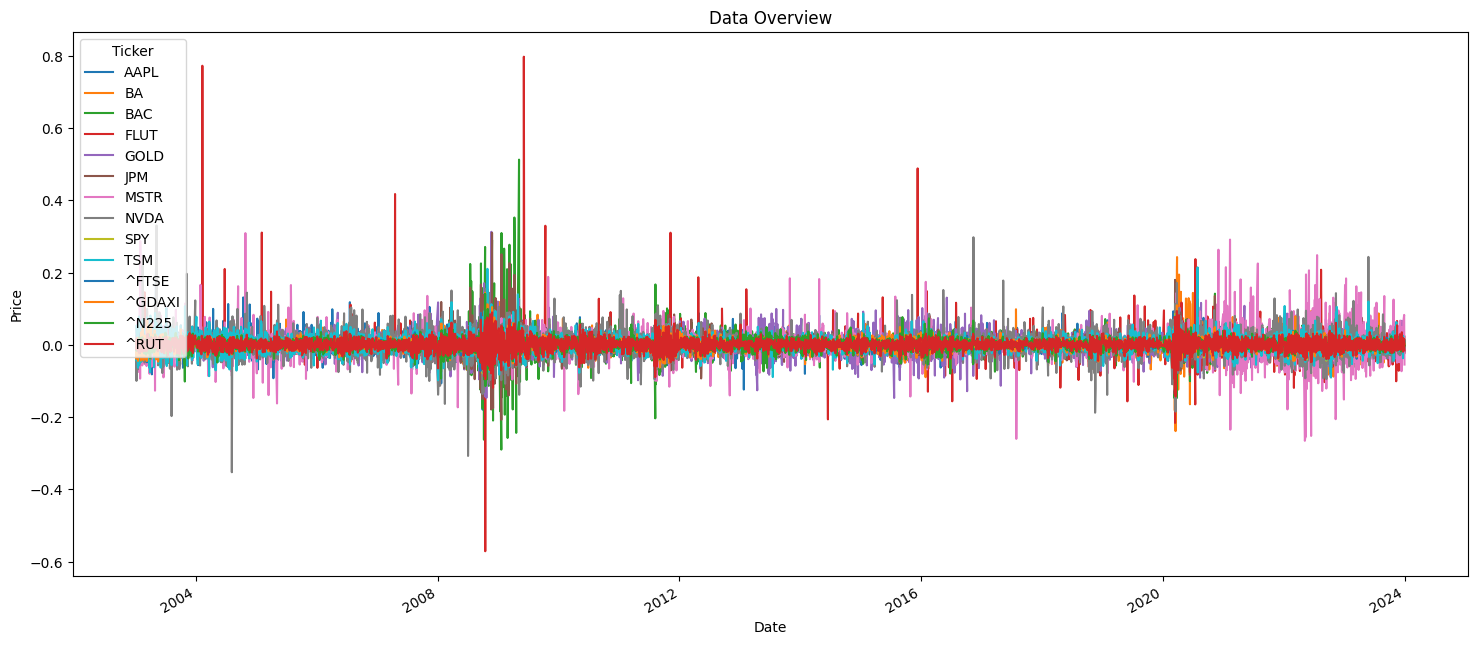

In [6]:
data.plot(figsize=(18, 8), ylabel="Price", title="Data Overview")

In [7]:
data.shape

(4853, 14)

In [8]:
# Transformation
X = data.copy("deep")
rows = len(X)
training_rows = int(rows * 0.8) # amount of training rows (80%)
training_rows


3882

In [57]:
X_train = X.head(training_rows)
X_test = X.tail(rows - training_rows)

# calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [58]:
def correlaiton_distance(corr):
    dist = ((1 - corr) / 2.0) ** 0.5
    return dist

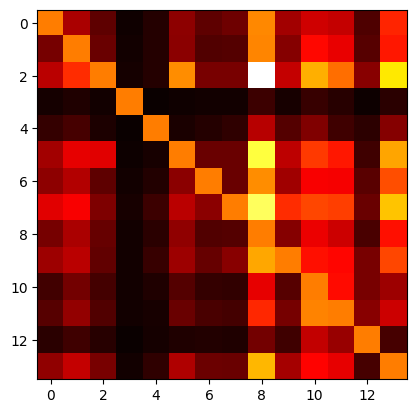

In [74]:
sigmas = returns.cov()

D = 1 / np.sqrt(np.diag(sigmas)) # takes the inverse of sqrt of diag.
corr =  D * sigmas * D
# corr = returns.corr()

plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()
# returns.corr()


In [63]:
# Calculate linkage
dist = correlaiton_distance(returns.corr())
link = linkage(dist, "ward") # TODO: investigate what this does
link[0]

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_79448/861281921.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, "ward") # TODO: investigate what this does


array([ 8.        , 13.        ,  0.33174373,  2.        ])

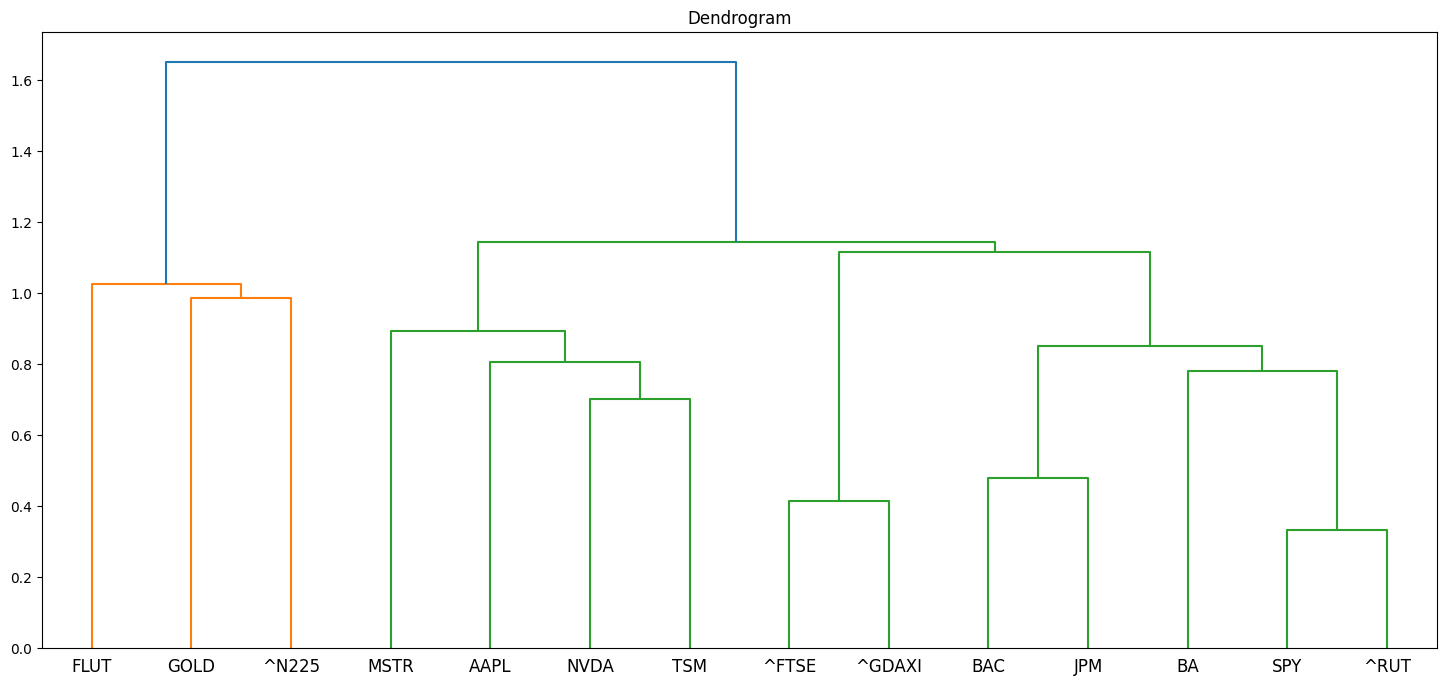

In [64]:
# Plot dendogram
plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
dendrogram(link, labels = X.columns)
plt.show()

In [92]:
hrp = HRP()
hrp.getQuasiDiag(link)
# link[-1,1]


[3, 4, 12, 6, 0, 7, 9, 10, 11, 2, 5, 1, 8, 13]

In [9]:
import sys
import os
sys.path.append(os.path.abspath('/Users/Francesco/HRP-Portfolio-Optimization/src'))
print(sys.path)

['/Users/Francesco/anaconda3/lib/python311.zip', '/Users/Francesco/anaconda3/lib/python3.11', '/Users/Francesco/anaconda3/lib/python3.11/lib-dynload', '', '/Users/Francesco/HRP-Portfolio-Optimization/venv/lib/python3.11/site-packages', '/Users/Francesco/HRP-Portfolio-Optimization/src']


In [16]:
from src import HRPPortfolio
from src.HRPPortfolio import HRPPortfolio

idk = HRPPortfolio()
idk.hierarchical_clustering()


TypeError: 'module' object is not callable